In [3]:
import os
import sys
import glob

import h5py
import nibabel as nib
import numpy as np


sys.path.append('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/tta_uia_segmentation/src')
from preprocessing.utils import get_filepaths

## Correct the Aneurysm label on image 04270916_VS_AComm

### Raw

In [6]:
img_path = '/scratch_net/biwidl319/jbermeo/data/raw/USZ/04270916_VS_AComm_Checked'

In [7]:
os.listdir(img_path)

['04270916_VS_AComm_Checked_seg.nii.gz',
 '04270916_VS_AComm_Checked_tof.nii.gz']

In [12]:
seg = nib.load(os.path.join(img_path, '04270916_VS_AComm_Checked_seg.nii.gz'))

In [16]:
# Remap label 11 to 4
seg_data = seg.get_fdata()
seg_data[seg_data == 11] = 4
seg_data = seg_data.astype(np.uint8)
nib.save(nib.Nifti1Image(seg_data, seg.affine, seg.header), os.path.join(img_path, '04270916_VS_AComm_Checked_seg_corrected.nii.gz'))

In [17]:
np.unique(seg_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       19], dtype=uint8)

### Resampled

In [18]:
img_path = '/scratch_net/biwidl319/jbermeo/data/preprocessed/1_resampled/USZ/04270916_VS_AComm_Checked'

In [19]:
seg = nib.load(os.path.join(img_path, '04270916_VS_AComm_Checked_seg.nii.gz'))

In [21]:
seg_data = seg.get_fdata()
seg_data[seg_data == 11] = 4
seg_data = seg_data.astype(np.uint8)
nib.save(nib.Nifti1Image(seg_data, seg.affine, seg.header), os.path.join(img_path, '04270916_VS_AComm_Checked_seg_corrected.nii.gz'))

In [ ]:
np.unique(seg_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       19], dtype=uint8)

## Check distribution of field of views on resample images

In [51]:
a = get_filepaths(preprocessed=True, path_to_dir='/scratch_net/biwidl319/jbermeo/data/preprocessed/1_resampled/Lausanne', every_scan_has_seg=False)

In [53]:
shapes = list()
for idx, img_fps in a.items():
    img = nib.load(img_fps['tof'])
    shapes.append(img.shape)
    
    # print pixel spacing
    print(img.header.get_zooms())
    

In [33]:
# USZ
np.median(np.array(shapes), axis=0)

array([566., 666., 181.])

In [39]:
# ADAM
np.median(np.array(shapes), axis=0)

array([666., 666., 116.])

In [54]:
# Lausanne
np.median(np.array(shapes), axis=0)

array([570., 700., 166.])

(array([ 3.,  1., 18.,  7.,  9.,  1.,  0.,  0.,  7., 10.]),
 array([499. , 519.1, 539.2, 559.3, 579.4, 599.5, 619.6, 639.7, 659.8,
        679.9, 700. ]),
 <BarContainer object of 10 artists>)

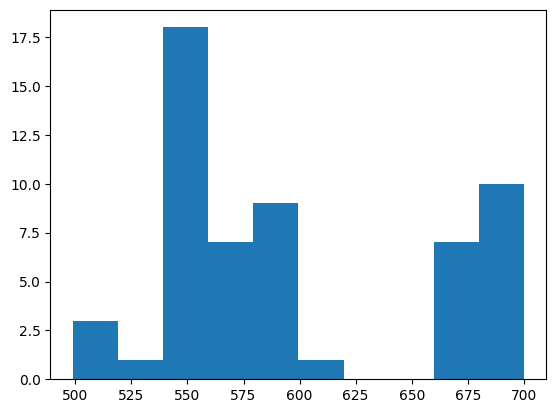

In [60]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(np.array(shapes)[:, 0],)

(array([ 1.,  0.,  0.,  3.,  0.,  0., 39.,  0., 12.,  1.]),
 array([600. , 616.6, 633.2, 649.8, 666.4, 683. , 699.6, 716.2, 732.8,
        749.4, 766. ]),
 <BarContainer object of 10 artists>)

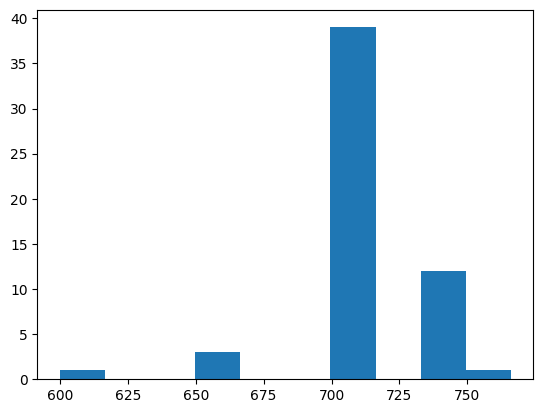

In [62]:
plt.hist(np.array(shapes)[:, 1])